## Week4

* Exercize 2:
Angular size of the horizon at a given redshift

In [43]:
import matplotlib
from matplotlib import pyplot as plt
import camb
import numpy as np

In [44]:
#Set the cosmology parameters in matter domination
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)

#Calculate the angular size of the horizon at a given redshift
#The angular size of the horizon is given by:
#theta = d_H/d_A 
#where d_H is the particle horizon and d_A is the angular diameter distance

#I compute the comoving distance at a given redshift:
z = 1100
z_array = np.linspace(1,1500,1500)
print(z_array[1099])
results = camb.get_background(pars)
comoving_distance = results.comoving_radial_distance(z_array)
print("The comoving distance at redshift z = 1100 is: ", comoving_distance[1099], " Mpc")


1100.0
The comoving distance at redshift z = 1100 is:  13806.557945722196  Mpc


In [45]:
#I compute the angular diameter distance at a given redshift:
angular_diameter_distance = results.angular_diameter_distance(z_array)
print("The angular diameter distance at redshift z = 1100 is: ", angular_diameter_distance[1099], " Mpc")

The angular diameter distance at redshift z = 1100 is:  12.5400162994752  Mpc


In [46]:
#I compute the particle horizon at a given redshift:
particle_horizon = 0
for i in range(0, z):
    particle_horizon += 1/(1+i)
print("The particle horizon at redshift z = 1100 is: ", particle_horizon, " Mpc")

#another way:


The particle horizon at redshift z = 1100 is:  7.580735600272019  Mpc


In [47]:
#Now I can compute the angular size of the horizon at the last scattering surface:
angular_size = particle_horizon/angular_diameter_distance
print("The angular size of the particle horizon at redshift z = 1100 is: ", angular_size[1099], " radians")
#The value in degrees is:
angular_size_deg = angular_size * 180/3.14159
print("The angular size of the particle horizon at redshift z = 1100 is: ", angular_size_deg[1099], " degrees")


The angular size of the particle horizon at redshift z = 1100 is:  0.6045235842786961  radians
The angular size of the particle horizon at redshift z = 1100 is:  34.63667925164178  degrees


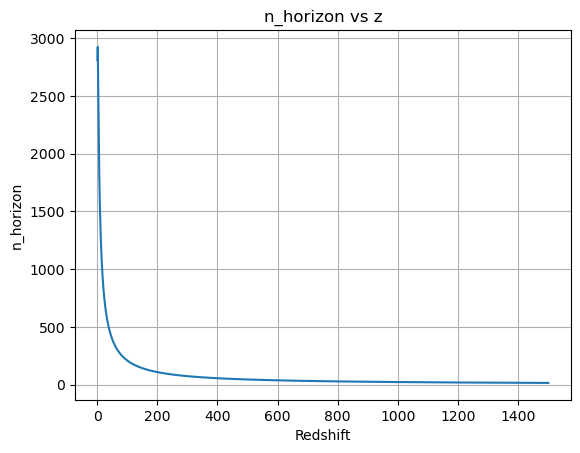

In [49]:
#Now I must compute how much horizon that I need to fully the sky:
#I want to compute: sky_area/horizon_area
#The total angular size of the sky is 4*pi radians
sky_area = 4*np.pi
#The horizon_area is the angular_size that I compute before,
#so the ratio is:
n_horizon = sky_area/angular_size

#make the plot of n_horizon vs redshift z
plt.plot(z_array, n_horizon)
plt.xlabel('Redshift')
plt.ylabel('n_horizon')
plt.title('n_horizon vs z')
plt.grid(True)
plt.show()


chiedere perche il suo grafico è giusto e il mio sbagliato!! non dovrebbe essere che andando indietro nel tempo l'uniberso è piu piccolo e quindi per rimepirlo ci voglio meno orizzonti

chiedere come calcolare il particle horizon!!!